# Experiment 2 - Lossless Compression

In [3]:
import numpy as np
import random
import string
import ctypes
import heapq
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import time

## Functions used for Huffman Code Generation

In [4]:
# A class `NodeTree` that represents a binary tree node is defined here.
class NodeTree(object):
    def __init__(self, left, right):
        self.left = left          # Initialization of left child node.
        self.right = right        # Initialization of right child node.

    def children(self):
        return self.left, self.right    # Return the left and right child nodes.

    def __str__(self):
        return self.left, self.right    # Return the tuple of the left and right child nodes.

In [5]:
# This function takes a node and a binary string as inputs, and returns a dictionary
def huffman_code_tree(node, binString=''):     
    if type(node) is str:                  # If the node is an string, add it to the dictionary with the binary str
        return {node: binString}
    (l, r) = node.children()              # Get the 'left' and 'right' children of the 'node'
    d = dict()                            # Create an empty dictionary called 'd'
    d.update(huffman_code_tree(l, binString + '0'))   # Recursively call 'huffman_code_tree' with the 'left' child and the binary string appended with '0', and update the 'd' dictionary with the returned values
    d.update(huffman_code_tree(r, binString + '1'))   # Recursively call 'huffman_code_tree' with the 'right' child and the binary string appended with '1', and update the 'd' dictionary with the returned values
    return d

In [6]:
# This function does tree traversal and saves tree traversal array in d
def tree_traversal(Node,d):
    if type(Node) is str:
        return Node
    d.append(Node.data)
    
     # Traverse the left and right children of Node recursively
    (l, r) = Node.children()
    temp1=tree_traversal(l,d)
    
    # If the left child has data, append it to the list
    if temp1 != None:         
        d.append(temp1)
    temp2=tree_traversal(r,d)
    
     # If the right child has data, append it to the list
    if temp2 != None:
        d.append(temp2)
    return

In [13]:
def huffman_encode(data):
    
    freq = defaultdict(int)     # To initialize the key values to 0
    for ch in data:             # To find Frequency( number of occurance) of a character
        freq[ch]+=1

    freq=dict(freq.items())     #Creating a dictionary containng characters and their respective frequencies
    freq=sorted(freq.items(), key=lambda x:x[1])    # Sort the dictonary according to descending order of frequencies

    while len(freq) > 1:          
        (key1, c1) = freq[0]        # Take first character as key 1 and its frequency as c1    
        (key2, c2) = freq[1]        # Take second character as key 2 and its frequency as c2
        freq = freq[2:]              # slice the dictionary in order to remove above used characters
        Node = NodeTree(key1, key2)  # pass above tow charcters to make a node
        Node.data='#'                # Node tree instance is created with # as data
        freq.append((Node, c1 + c2)) # Assign value of the node as sum of frequencies
        freq= sorted(freq, key=lambda x: x[1]) # Sort the keys based on the frequencies in the tuple
   
    binString=''
    if type(Node) is str:        
            Node: binString
    (l, r) = Node.children()
    d = dict()
    d.update(huffman_code_tree(l, binString + '0')) # Update left node traversal value in the Huffman tree
    d.update(huffman_code_tree(r, binString + '1')) # Update right node traversal value in the Huffman tree
    d=list(d.items())     # Updates d dictionary values into list of tuples with key value pair
    
    return freq,d

In [14]:
def encode(data,d):
    encoded=''                        # Initializes an empty string
    for ch in data:
        for i in range(len(d)):       
            if(ch==d[i][0]):          # For a character in data 
                encoded+=d[i][1]      # Appends the Huffman code to the encoded string
                break
    return encoded

In [15]:
def bytes_conversion(encoded,tree_traversal_array):     
    # Pad the encoded data to a multiple of 8 bits
    padding = 8 - len(encoded) % 8         # Finding the number of bits to be padded with zeros
    encoded += padding * '0'               # Padded with zeros

    # Convert the encoded data to bytes
    tree_traversal_array[0]=chr(tree_traversal_array[0])   # Conversion of ASCII value to character
        
    tree_byte=bytearray([ord(tree_traversal_array[i]) for i in range(0, len(tree_traversal_array), 1)])
    
    data_byte = bytearray([int(encoded[i:i+8], 2) for i in range(0, len(encoded), 8)])
    return tree_byte,data_byte

## 3.1.3  1. Generate .txt file

In [16]:
N=[50,100,500,1000,5000]
save=["text_50","text_100","text_500","text_1000","text_5000"]
for t in range(10):            # Here t represents batch number. At last there will be 10 Bacthes
    for i in range(len(N)):     # Each batch contains a text five text files containg 50,100,500,1000,5000 charactes in each text file resp
        n=N[i]   
        rand_text = ''.join(random.choices(string.ascii_lowercase +
                             string.digits, k=n))    
           
        file = open(str(t+1)+"_{}.txt".format(save[i]), "w")      # to write a text file
        file.write(str(rand_text))
        file.close() 

## 3.1.3  2. Encode each file and store it as .huf file

In [18]:
encoded_text=["encode_50","encode_100","encode_500","encode_1000","encode_5000"]
encode_computation_time=np.zeros([10,5])       # creating computation time Time array

for t in range(10):
    for i in range(5):
        encode_start_time=time.time()         # start computation time
        data=open(str(t+1)+'_'+str(save[i])+'.txt', 'r')
        data=data.read()                      # Read data from input text file
        freq,d=huffman_encode(data)           # Call Huffman encode function
        
        print(data)
    
        tree_traversal_array=[]
        tree_traversal(freq[0][0],tree_traversal_array)
        print(tree_traversal_array)
        Tree_preorder=[len(tree_traversal_array)]+tree_traversal_array
        #print(Tree_preorder)
        encoded=encode(data,d)
        tree_byte,data_byte=bytes_conversion(encoded,Tree_preorder)

        with open(str(t+1)+"_{}.huf".format(encoded_text[i]), 'wb') as file:m 
            file.write(tree_byte)
            file.write(data_byte)
        encode_computation_time[t,i]=time.time()-encode_start_time    # stop computation time and save time interval

p4w25gevuldyobmoz27yoe2occf0mshyzzu1ez5gsnb3bn3gzf
['#', '#', '#', '#', '#', 'l', 'd', '#', '7', '0', 'z', '#', '#', '#', 'h', '1', '2', '#', 'g', 'e', '#', '#', '#', 'y', 'b', '#', 'o', '#', '5', 'u', '#', '#', '#', 'm', 'c', '#', 'f', 's', '#', '#', 'n', '3', '#', '#', 'p', '4', '#', 'w', 'v']
6sburu53kewkwce665didrx4nlc43mi3v4phdgzdlfqqflsvvqaaqwk29d49lzc43sa4g931f7tspke9pd1ov1e3wahuc7nk3uxg
['#', '#', '#', '#', '#', 'x', 'n', '#', 'h', 'z', '#', '#', '7', '#', 'b', 'm', 'k', '#', '#', '#', '#', '2', 't', '6', 'd', '#', '4', '#', 'p', 'g', '#', '#', '#', '#', 'f', '1', '3', '#', '#', '#', 'o', 'r', 's', '#', 'u', 'e', '#', '#', '#', 'w', 'c', '#', 'l', 'v', '#', '#', 'q', 'a', '#', '9', '#', '5', 'i']
d5x3rcfjj7g75dvq1emi7tlt461s32ec265ddx6j39aypwa32ou68nigvfd6rpu95f6zivdgq8urxabgtgl15nvbn0es6l9ddajgszbd1hwgncemn92cdax0gzcos40hvpo73ld8qywumb515ppvtlwt6eh56qjhi4q956t1vrlagpm21qhgn9l2awv73rr7iq7fg3g51uziu54jhi7j24wzidombxr9gkb1smbid13ietihvljynvv7cxub9diuntlm9myfwprpu61klazf76gnyb69bi

## Compression Factor

In [43]:
file_size_ori=[]
file_size_comp=[]
comp_ratio=np.zeros([10,5])
for t in range(10):
    for i in range(5):
        file_ori=str(t+1)+'_text_'+str(N[i])+'.txt'
        file_enco=str(t+1)+'_encode_'+str(N[i])+'.huf'
        temp_ratio=os.stat(file_ori).st_size/os.stat(file_enco).st_size
        comp_ratio[t,i]=temp_ratio

comp_ratio,

(array([[0.5952381 , 0.8       , 1.26582278, 1.39082058, 1.50421179],
        [0.54945055, 0.74074074, 1.26582278, 1.38696255, 1.50693189],
        [0.61728395, 0.7518797 , 1.26903553, 1.38888889, 1.50466446],
        [0.5952381 , 0.76923077, 1.26582278, 1.39275766, 1.50421179],
        [0.58139535, 0.78740157, 1.27226463, 1.39275766, 1.50557061],
        [0.61728395, 0.79365079, 1.26582278, 1.39470014, 1.50330728],
        [0.63291139, 0.76335878, 1.26903553, 1.39470014, 1.50557061],
        [0.61728395, 0.7518797 , 1.2755102 , 1.39275766, 1.5060241 ],
        [0.5952381 , 0.80645161, 1.26903553, 1.39082058, 1.50466446],
        [0.58823529, 0.7751938 , 1.26582278, 1.39082058, 1.5051174 ]]),)

{'whiskers': [<matplotlib.lines.Line2D at 0x2501e4f05d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2501e4f18d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2501e4dbc90>,
 'medians': [<matplotlib.lines.Line2D at 0x2501e4f2a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x2501e4f0f90>,
 'means': []}

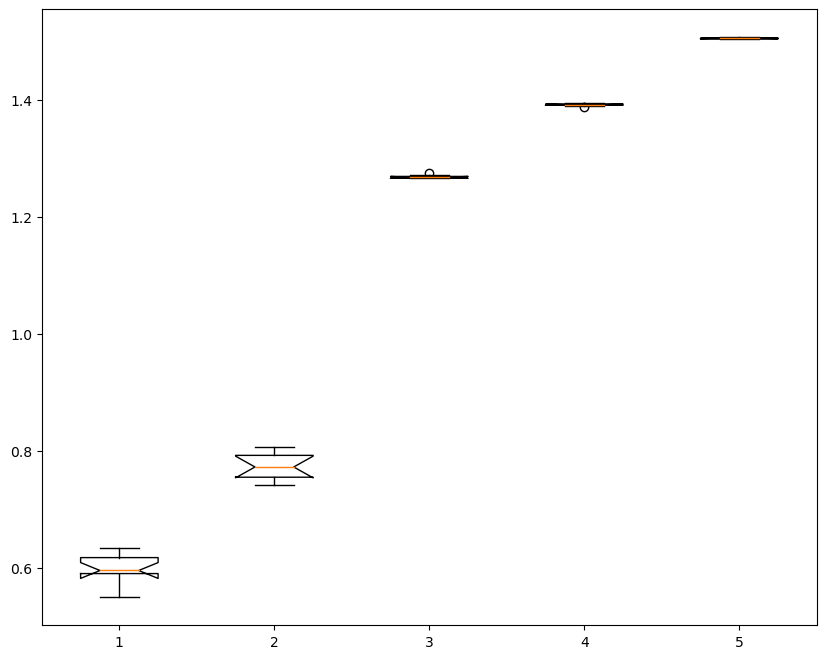

In [45]:
plt.figure(figsize=[10,8])
plt.boxplot(comp_ratio,1)

## Decoder

In [47]:
# define a class called node1

class node1(object):
    # define the constructor method for the node1 class
    def __init__(self):
        # initialize the left and right child nodes to None
        self.left=None
        self.right=None
        
         # initialize the data stored in the node to None
        self.data=None
        
    # define a method to return the left and right child nodes of a node
    def children(self):
        return self.left, self.right
    
    # define a method to convert a node to a string
    def __str__(self):
        return self.left, self.right             # return the left and right child nodes as a string

In [48]:
def huffman_code_tree_1(node, binString=''):
    
    if type(node) is str:          #if the node is a string, return a dictionary with the node as the key and the binary string as the value
        return {node: binString}
    
    
    (l, r) = node.children()    # otherwise, get the left and right child nodes of the current node  
    d = dict()                  # create an empty dictionary to store the binary codes
    
    
    d.update(huffman_code_tree_1(l, binString + '0'))    # recursively call the function on the left child node with the binary string plus 0
    d.update(huffman_code_tree_1(r, binString + '1'))    # recursively call the function on the right child node with the binary string plus 1
    
    
    return d        # return the dictionary with the binary codes         

In [50]:
#This code defines three functions to build a binary tree from its inorder traversal and root node.

def buildTree (inorder,root):   # Function takes two parameters: inorder traversal and the root node of the tree.    
    
    temp=inorder[0]       #It first takes the first element of inorder as the temporary root node, 
    inorder=inorder[1:]   #  removes it from the list, and checks if it is a leaf node (indicated by '#')
    
    #If it is a leaf node, it assigns '#' to the data attribute of the root node and 
    #calls the buildTree_left() and buildTree_right() functions
    if temp == '#':
        root.data='#'
        root.left,inorder=buildTree_left(inorder,root)    
        root.right,inorder=buildTree_right(inorder,root)
        
    else:
        root=temp    
    return root,inorder     


#The buildTree_left() function takes the remaining inorder list and the current root node as parameters
def buildTree_left (inorder,root):
    temp=inorder[0]
    inorder=inorder[1:]
    
    #create a new node object for the leaf node instead of assigning '#' to the existing node.
    if temp == '#':
        Node=node1()
        Node.data='#'
        root.left=Node
        
        Node.left,inorder=buildTree_left(inorder,Node)
        Node.right,inorder=buildTree_right(inorder,Node)
        
        
        return root.left,inorder    #returns the left child node and the remaining inorder list.
    else:
        root=temp  
        return root,inorder  
       
#The buildTree_right() function is similar to buildTree_left() but builds the right subtree.
def buildTree_right (inorder,root):
    temp=inorder[0] 
    inorder=inorder[1:]
    if temp == '#':
        Node=node1()
        Node.data='#'
        root.right=Node 
        
        Node.left,inorder=buildTree_left(inorder,Node)  
        Node.right,inorder=buildTree_right(inorder,Node) 
        
        return root.right,inorder 
    else:
        root=temp   
        return root,inorder

In [54]:
def decode(tree_traversal_array,encoded):
    Node=node1()
    _,_=buildTree(tree_traversal_array,Node)

    binString=''
    if type(Node) is str:        # here check that node is leaf node or derrived node if it is leaf node then append it to binstring
            Node: binString
    (l, r) = Node.children()    # else find the child node of given node
    d = dict()
    d.update(huffman_code_tree_1(l, binString + '0'))
    d.update(huffman_code_tree_1(r, binString + '1'))
    d=list(d.items())
    
    Decoded=''
    search=''
    for ch in encoded:
        search+=ch
        for i in range(len(d)):
            if(search==d[i][1]):
                Decoded+=d[i][0]
                search=''
                break
    
    return Decoded

In [56]:
# Read Huffman tree from the .huf file
N=[50,100,500,1000,5000]
encoded_text=["encode_50","encode_100","encode_500","encode_1000","encode_5000"]
decoded_text=["decode_50","decode_100","decode_500","decode_1000","decode_5000"]
decode_computation_time=np.zeros([10,5])           #  creating computation time Time array
for t in range(10):
    for i in range(5):
        decode_start_time=time.time()               # start computation time
        tree_traversal_array = []
        encoded=''
        with open(str(t+1)+"_{}.huf".format(encoded_text[i]), 'rb') as file:
            # # Read one character and code length at a time until end of Huffman tree
            data=file.read()
            n=data[0]
            for j in range(1,len(data)):
                if j<=n:
                    tree_traversal_array.append(chr(data[j]))
                else:
                    encoded+=format(data[j],'08b')
                
        Decoded=decode(tree_traversal_array,encoded)
        with open(str(t+1)+"_{}.txt".format(decoded_text[i]), 'w') as file:
            file.write(Decoded)  
        decode_computation_time[t,i]=time.time()-decode_start_time    #stop compuatation time and save it

## MSE Calculation

In [57]:
mse=np.zeros([10,5])
for t in range(10):
    for i in range(len(N)):
        f1 = open(str(t+1)+'_'+'text_'+str(N[i])+'.txt','r')
        f2 = open(str(t+1)+'_'+'decode_'+str(N[i])+'.txt','r')
        array_1 = f1.read().split(',')
        array_2 = f2.read().split(',')
    
        if  array_1==array_2:
            mse[t,i]=0
            #print("MSE for text file containing {} characters is 0.0".format(N[i]))
        else:
            if len(array_1[0])<=len(array_2[0]):
                k=len(array_1[0])
            else:
                k=len(array_2[0])

            mismatch=0
            for j in range(k):
                if array_1[0][j]!=array_2[0][j]:
                    mismatch += 1
            mse[t,i]=mismatch
           
mse

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])